In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [3]:
dataset=pd.read_csv('D:\Solo-Leveling\Project\insurance_premium_prediction\dataset\insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataset['smoker'].dtypes

dtype('O')

In [8]:
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<=25]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print('numerical_features',numerical_features,' Size: ',len(numerical_features))
print('discrete_feature',discrete_feature,' Size: ',len(discrete_feature))
print('continuous_feature',continuous_feature,' Size: ',len(continuous_feature))

numerical_features ['age', 'bmi', 'children', 'expenses']  Size:  4
discrete_feature ['children']  Size:  1
continuous_feature ['age', 'bmi', 'expenses']  Size:  3


c:\Users\Admin\anaconda3\envs\dlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

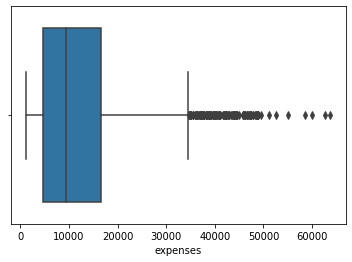

In [9]:
sns.boxplot(dataset['expenses'])

In [10]:
for column in dataset.columns:
    print(column,' : ',dataset[column].unique())

age  :  [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
sex  :  ['female' 'male']
bmi  :  [27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 28.8 37.4 17.8 34.7
 26.5 22.  35.9 25.6 25.2 32.5 25.3 38.8 30.5 37.7 24.1 24.4 27.8 36.9
 39.6 28.2 33.2 18.9 41.5 30.3 16.  33.3 29.2 26.4 30.7 41.9 32.1 30.6
 18.1 39.3 36.1 22.3 26.7 23.2 38.1 22.2 38.4 29.1 22.1 26.8 30.  20.9
 17.3 34.2 25.4 40.2 24.3 42.4 19.8 30.2 29.4 27.6 20.6 21.6 40.6 48.1
 36.8 45.5 23.  22.6 37.5 38.  34

Text(0.5, 1.0, 'Age vs expenses')

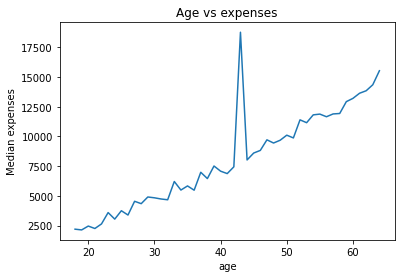

In [11]:
dataset.groupby('age')['expenses'].median().plot()
plt.xlabel("age")
plt.ylabel("Median expenses")
plt.title("Age vs expenses")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

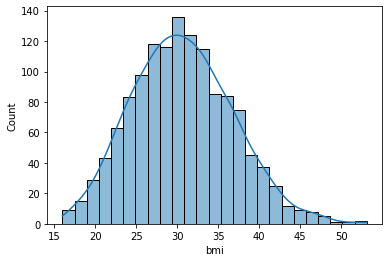

In [18]:
sns.histplot(dataset['bmi'],kde=True)

c:\Users\Admin\anaconda3\envs\dlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

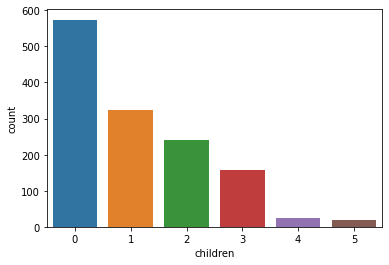

In [20]:
sns.countplot(dataset['children'])

c:\Users\Admin\anaconda3\envs\dlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

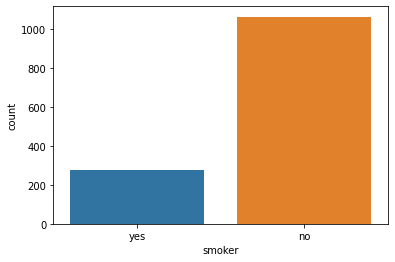

In [21]:
sns.countplot(dataset['smoker'])

c:\Users\Admin\anaconda3\envs\dlp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

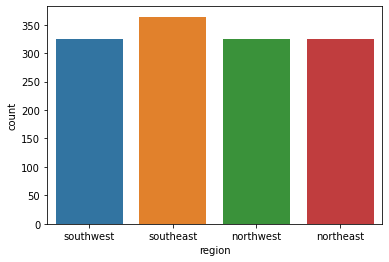

In [22]:
sns.countplot(dataset['region'])